# Interactive Python spot diagrams
The data of any spot diagram displayed within OpTaliX can be written out to an ASCII file with the macro command: "SPO FILE spot.txt". This file can afterwards be opened and plotted with python. Here the package "plotly" is used to create interactive spot diagrams for all fields.

This is the original OpTaliX spot diagram in the gui:

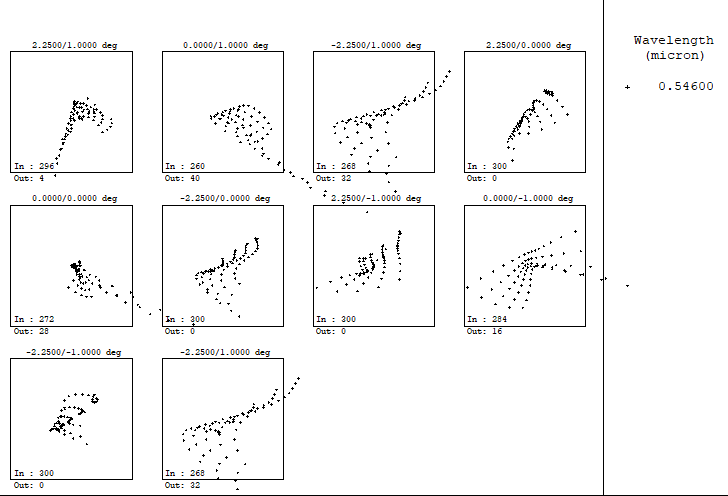

In [1]:
PATH = r'C:\Users\herbst\OpticalDesignDocu'
from IPython.display import Image
Image(filename = PATH + "\OpTaliX\OpTaliX_spot_diagram.png", width=1000, height=800)

Now we create the python plot:

In [2]:
import numpy as np
import matplotlib.pylab as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.colors import n_colors

import time 

t0 = time.perf_counter()


def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return np.array([sum_x/length, sum_y/length])


import os
cwd = os.getcwd()
filename = os.path.join(cwd,os.path.join("OpTaliX","spot.txt"))


spotdata = np.loadtxt(filename)

spotdata_pos1 = spotdata[spotdata[:,0]==1]

n_fields = 9
n_colors = n_fields

spotdata_pos_L =[]
centroid_L = []
rms_spot_size_L = []
for i in range(0, n_colors):
    spotdata_pos_L.append(spotdata_pos1[spotdata_pos1[:,1]==i+1])
    centroid_L.append(centeroidnp(spotdata_pos_L[i][:,-2:]))
    rms_spot_size_L.append(np.sqrt(np.sum((np.linalg.norm(centroid_L[i] - spotdata_pos_L[i][:,-2:], axis=1))**2)/len(spotdata_pos_L[i][:,-2:])))
    
spotdata_pos1_f1 = spotdata_pos1[spotdata_pos1[:,1]==1]
spotdata_pos1_f2 = spotdata_pos1[spotdata_pos1[:,1]==2]

Lim = 0.4     # in [mm]
Limit = (-Lim,Lim)
marker=dict(
            color='LightSkyBlue',
            size=5,
            line=dict(
                color='Black',
                width=0.5
            ))
          
Titles = ('Field 1','Field 2','Field 3', 'Field 4', 'Field 5', 'Field 6', 'Field 7', 'Field 8', 'Field 9')  

# with some colormap "turbo"
colors = px.colors.sample_colorscale("turbo", [n/(n_colors -1) for n in range(n_colors)])

def to_rgb(name):
    from matplotlib import colors
    import matplotlib.cm
    C = colors.to_rgba(name)
    c = 'rgb'+str((C[0], C[1], C[2]))
    return c
# with OpTaliX Field colors:
colors = (to_rgb('red'),to_rgb('green'),to_rgb('blue'), to_rgb('magenta'), to_rgb('cyan'),to_rgb('yellow'), to_rgb('orange'), to_rgb('mediumpurple'), to_rgb('lightseagreen'))



fig = make_subplots(rows=3,cols=3, vertical_spacing=0.1,
                  horizontal_spacing=0.1,
                  shared_yaxes='all', subplot_titles=Titles,
                  x_title='x / mm',
                  y_title='y / mm')
#fig.add_scatter(x=spotdata_pos1_f1[:,-2], y=spotdata_pos1_f1[:,-1], mode='markers', row = 1, col=1, marker = marker)
#fig.add_scatter(x=spotdata_pos1_f2[:,-2], y=spotdata_pos1_f2[:,-1], mode='markers', row = 1, col=2, marker = marker)
row_L = np.array([1,1,1,2,2,2,3,3,3])
col_L = np.array([1,2,3,1,2,3,1,2,3])
for i in range(0, n_colors):
    fig.add_scatter(x=spotdata_pos_L[i][:,-2], y=spotdata_pos_L[i][:,-1], mode='markers', row = row_L[i], col=col_L[i], marker = marker, marker_color = colors[i],
                    name=Titles[i])
    fig.add_annotation(x=0, y=Limit[1]*0.75,
                text="centroid: "+str(np.round(centroid_L[i][0],decimals=2))+ ", "+str(np.round(centroid_L[i][0],decimals=2)),
                showarrow=False,
                arrowhead=0,
                row = row_L[i],
                col=col_L[i])
    
    fig.add_annotation(x=0, y=Limit[1]/4,
                text="RMS spot size: "+str(np.round(rms_spot_size_L[i],decimals=2))+" mm",
                showarrow=True,
                arrowhead=1,
                row = row_L[i],
                col=col_L[i])
    
    fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=centroid_L[i][0]-rms_spot_size_L[i], y0=centroid_L[i][1]-rms_spot_size_L[i] , x1=centroid_L[i][0]+rms_spot_size_L[i], y1=centroid_L[i][1]+rms_spot_size_L[i],
    line_color=colors[i], row = row_L[i], col=col_L[i]
    )
    
    fig.update_layout(title_font_color=colors[i])


fig.update_xaxes(range=[Limit[0], Limit[1]], dtick=0.2)
fig.update_yaxes(range=[Limit[0], Limit[1]], dtick=0.2)
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.update_layout(height=900, width=900)#, template='plotly_white')
#fig.show(renderer="browser")


print("Elapsed time: ", np.round(time.perf_counter()-t0, decimals = 4), " s")


Elapsed time:  0.9849  s


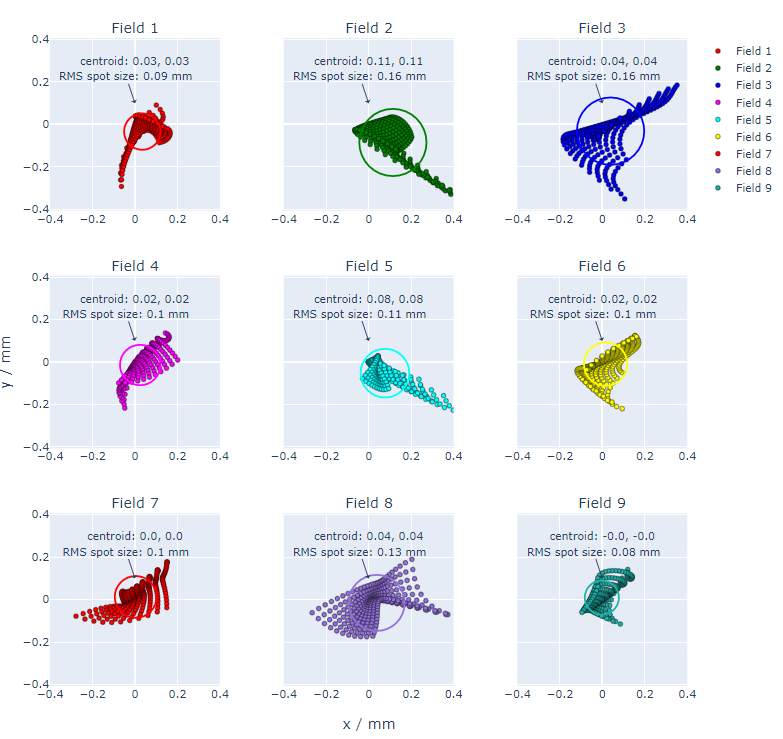

In [3]:
PATH = r'C:\Users\herbst\OpticalDesignDocu'
from IPython.display import Image
Image(filename = PATH + "\OpTaliX\plotly_spot_diagram.png", width=1000, height=800)

And because it is "plotly" the diagram is fully interactive:

In [4]:
fig